<a href="https://colab.research.google.com/github/TuanAnhNguyenIUH/HPO_CLASSFICATION_FILE/blob/main/HPO_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Optimization (HPO) of Machine Learning Models
L. Yang and A. Shami, “On hyperparameter optimization of machine learning algorithms: Theory and practice,” Neurocomputing, vol. 415, pp. 295–316, 2020, doi: https://doi.org/10.1016/j.neucom.2020.07.061.

### **Sample code for classification problems**  
**Dataset used:**  
&nbsp; MNIST from sklearn

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).
**Performance metric:**  
&nbsp; Classification accuracy


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats


## Load MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

You can read more about the data and the variables [[1]](http://yann.lecun.com/exdb/mnist/) [[2]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits/).

In [3]:
d = datasets.load_digits()
X = d.data
y = d.target


Dòng code bạn cung cấp liên quan đến việc tải và sử dụng bộ dữ liệu "Digits" từ thư viện `sklearn.datasets`. Bộ dữ liệu này chứa các hình ảnh nhỏ của các chữ số viết tay (từ 0 đến 9), được sử dụng rộng rãi trong các bài toán nhận dạng mẫu và học máy. Dưới đây là giải thích chi tiết về từng dòng code:

Tải Bộ Dữ Liệu:
- `d = datasets.load_digits()`: Dòng này tải bộ dữ liệu "Digits" vào biến `d`. Bộ dữ liệu này bao gồm các hình ảnh 8x8 pixel của các chữ số viết tay, cùng với nhãn tương ứng cho mỗi hình ảnh.

 Dữ Liệu Đầu Vào (X):
- `X = d.data`: Biến `X` được gán cho mảng các hình ảnh trong bộ dữ liệu, nơi mỗi hình ảnh đã được chuyển đổi thành một vector 1 chiều gồm 64 giá trị (8x8 pixels). Mỗi giá trị trong vector đại diện cho một pixel, với giá trị cường độ từ 0 đến 16.

Nhãn Đầu Ra (y):
- `y = d.target`: Biến `y` chứa nhãn tương ứng cho mỗi hình ảnh trong `X`, đại diện cho chữ số mà hình ảnh đó biểu diễn (từ 0 đến 9).

Sử Dụng:
- Bộ dữ liệu `X` và `y` này có thể được sử dụng để huấn luyện một mô hình học máy, ví dụ như một mô hình phân loại để nhận dạng các chữ số viết tay. Bạn có thể áp dụng các thuật toán như Hồi quy Logistic, Máy vector hỗ trợ (SVM), hoặc một mạng nơ-ron để thực hiện nhiệm vụ phân loại.

Bộ dữ liệu "Digits" là một ví dụ điển hình được sử dụng trong giáo dục và nghiên cứu về học máy, do nó cung cấp một bài toán nhận dạng hình ảnh đơn giản mà không yêu cầu phần cứng tính toán mạnh mẽ để xử lý.

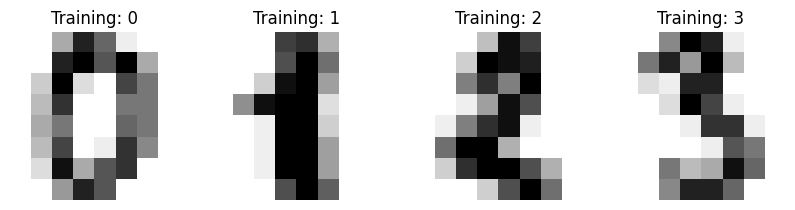

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

Đoạn code này sử dụng thư viện `matplotlib` để hiển thị các hình ảnh từ bộ dữ liệu "Digits", cụ thể là bốn hình ảnh đầu tiên cùng với nhãn của chúng. Dưới đây là giải thích chi tiết về từng phần của đoạn code:

 Tạo Bố Cục Hình Ảnh:
- `_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))`: Dòng này tạo một lưới 1x4 để hiển thị 4 hình ảnh. `figsize=(10, 3)` chỉ định kích thước của hình vẽ là 10x3 inch. Biến `_` được sử dụng để bỏ qua đối tượng hình vẽ (figure) trả về từ `subplots`, vì chúng ta chỉ quan tâm đến mảng các trục (`axes`).

Hiển Thị Các Hình Ảnh và Nhãn:
- Vòng lặp `for ax, image, label in zip(axes, d.images, d.target):` lặp qua mỗi trục (`ax`), hình ảnh (`image`), và nhãn (`label`) trong bộ dữ liệu. `zip` được sử dụng để ghép các trục từ `axes`, các hình ảnh từ `d.images`, và các nhãn từ `d.target` thành từng cặp tương ứng.

 Cấu Hình Trục:
- `ax.set_axis_off()`: Xóa các trục tọa độ để chỉ hiển thị hình ảnh.
- `ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")`: Hiển thị hình ảnh trên trục tương ứng. `cmap=plt.cm.gray_r` sử dụng bản đồ màu xám ngược (màu sáng đại diện cho giá trị thấp) để hiển thị hình ảnh. `interpolation="nearest"` chỉ định phương thức nội suy để sử dụng khi hiển thị hình ảnh.

Đặt Tiêu Đề:
- `ax.set_title("Training: %i" % label)`: Đặt tiêu đề cho mỗi hình ảnh dựa trên nhãn của nó, hiển thị văn bản dạng "Training: x", trong đó "x" là nhãn của hình ảnh.

 Hiển Thị Hình Ảnh:
- `plt.show()`: Hiển thị hình ảnh đã được tạo ra. Nếu bạn đang sử dụng một môi trường như Jupyter Notebook, hình ảnh sẽ được hiển thị ngay trong notebook.

Tóm lại, đoạn code này giúp hiển thị 4 hình ảnh đầu tiên từ bộ dữ liệu "Digits" cùng với nhãn của chúng, được sử dụng như một phần của quá trình phân tích dữ liệu để hiểu rõ hơn về bộ dữ liệu mà bạn đang làm việc.

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

## Using 3-Fold Cross-Validation

Sử dụng 3-Fold Cross-Validation (CV) trong học máy là một phương pháp để đánh giá hiệu suất của một mô hình thông qua việc chia dữ liệu thành 3 phần (hay "folds") độc lập. Trong mỗi lần lặp của quá trình CV, một phần dữ liệu sẽ được dùng làm tập kiểm định (test set) và hai phần còn lại được dùng làm tập huấn luyện (training set). Quy trình này được lặp lại 3 lần, sao cho mỗi phần dữ liệu đều được dùng làm tập kiểm định một lần. Kết quả cuối cùng thường là trung bình cộng của hiệu suất mô hình đạt được trên mỗi lần lặp.

### Random Forest

In [ ]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9426822481914301



Đoạn code bạn cung cấp thực hiện việc huấn luyện một mô hình phân loại sử dụng thuật toán Random Forest và đánh giá nó thông qua 3-Fold Cross-Validation (CV) với chỉ số đánh giá là độ chính xác (accuracy). Dưới đây là giải thích chi tiết:

Khởi Tạo Mô Hình Random Forest:
clf = RandomForestClassifier(): Khởi tạo một mô hình Random Forest Classifier mà không chỉ định bất kỳ siêu tham số nào, nghĩa là tất cả các siêu tham số đều ở giá trị mặc định của scikit-learn.
Huấn Luyện Mô Hình:
clf.fit(X, y): Huấn luyện (fit) mô hình clf trên toàn bộ tập dữ liệu X và nhãn tương ứng y. Đây là bước không cần thiết khi sử dụng cross_val_score, vì cross_val_score sẽ tự động huấn luyện mô hình trên các phần dữ liệu huấn luyện tương ứng khi thực hiện CV.
Đánh Giá Mô Hình Sử Dụng 3-Fold Cross-Validation:
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy'): Sử dụng hàm cross_val_score để đánh giá mô hình clf trên tập dữ liệu X và y bằng cách chia tập dữ liệu thành 3 phần (3-Fold CV). Mỗi phần sẽ lần lượt đóng vai trò là tập kiểm định trong khi hai phần còn lại được dùng để huấn luyện mô hình. Chỉ số đánh giá được sử dụng là 'accuracy' (độ chính xác).
In Độ Chính Xác Trung Bình:
print("Accuracy:" + str(scores.mean())): Tính và in ra độ chính xác trung bình từ 3 lần đánh giá của Cross-Validation. Đây là một ước lượng về hiệu suất mô hình dự kiến trên dữ liệu chưa biết, dựa trên việc tổng hợp kết quả từ các phần dữ liệu kiểm định.
Mặc dù việc gọi clf.fit(X, y) không ảnh hưởng tới kết quả của cross_val_score (vì cross_val_score tự huấn luyện mô hình trong quá trình CV), việc này có thể hữu ích nếu bạn muốn giữ lại mô hình được huấn luyện trên toàn bộ tập dữ liệu để sử dụng sau này, ví dụ như cho việc dự đoán.

### SVM

In [ ]:
#SVM
clf = SVC()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9699499165275459


Đoạn code bạn cung cấp thực hiện việc huấn luyện và đánh giá một mô hình Máy Vector Hỗ Trợ (Support Vector Machine - SVM) sử dụng 3-Fold Cross-Validation và tính toán độ chính xác trung bình của mô hình trên tập dữ liệu. Dưới đây là giải thích chi tiết:

Khởi Tạo Mô Hình SVM:
- `clf = SVC()`: Dòng này tạo một instance của lớp `SVC` (Support Vector Classifier), một biến thể của SVM được sử dụng cho bài toán phân loại, từ thư viện `sklearn.svm`. Mô hình này được khởi tạo với các tham số mặc định.

Huấn Luyện Mô Hình:
- `clf.fit(X, y)`: Huấn luyện (fit) mô hình `clf` sử dụng dữ liệu đầu vào `X` và nhãn đầu ra `y`. Đây là bước chuẩn bị mô hình để có thể thực hiện dự đoán.

Đánh Giá Mô Hình Sử Dụng 3-Fold Cross-Validation:
- `scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')`: Dùng hàm `cross_val_score` để thực hiện 3-Fold Cross-Validation trên mô hình `clf` với tập dữ liệu `X` và `y`. `cv=3` chỉ định số lượng phần (folds) trong Cross-Validation là 3, và `scoring='accuracy'` chỉ định rằng tiêu chí đánh giá là độ chính xác (accuracy).

In Độ Chính Xác Trung Bình:
- `print("Accuracy:" + str(scores.mean()))`: Tính toán và in ra độ chính xác trung bình từ các lần đánh giá trong Cross-Validation. Điều này cho ta biết mức độ tốt mà mô hình SVM hoạt động trên tập dữ liệu dựa trên phép đo độ chính xác.

Qua đoạn code này, bạn có thể thấy cách sử dụng SVM và Cross-Validation để đánh giá hiệu suất của mô hình một cách khách quan, không phụ thuộc vào một tập dữ liệu cố định nào, qua đó giúp hiểu rõ hơn về khả năng tổng quát hóa của mô hình đối với dữ liệu mới.

### KNN

In [ ]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9627317178438357


Đoạn code bạn cung cấp thực hiện việc huấn luyện và đánh giá một mô hình K-Nearest Neighbors (KNN) sử dụng 3-Fold Cross-Validation để đo độ chính xác. Dưới đây là một cái nhìn chi tiết về từng bước:

Khởi Tạo Mô Hình KNN:
- `clf = KNeighborsClassifier()`: Dòng này tạo một instance của lớp `KNeighborsClassifier` từ thư viện `sklearn.neighbors`, sử dụng các tham số mặc định. KNeighborsClassifier là một thuật toán phân loại dựa trên thuật toán K-Nearest Neighbors, nơi một điểm dữ liệu được phân loại dựa trên các nhãn của k điểm dữ liệu gần nhất trong không gian đặc điểm.

Huấn Luyện Mô Hình:
- `clf.fit(X, y)`: Dòng này huấn luyện mô hình `clf` sử dụng dữ liệu đầu vào `X` và nhãn `y`. Trong KNN, "huấn luyện" thực chất không liên quan đến việc tính toán nặng nề như trong các mô hình khác; thay vào đó, mô hình chỉ lưu trữ dữ liệu để sử dụng trong quá trình dự đoán.

Đánh Giá Mô Hình Sử Dụng 3-Fold Cross-Validation:
- `scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')`: Hàm `cross_val_score` được sử dụng để tự động thực hiện 3-Fold Cross-Validation trên mô hình `clf` với dữ liệu `X` và nhãn `y`. Trong mỗi fold, một phần của dữ liệu được giữ lại để kiểm định, và phần còn lại được sử dụng để huấn luyện mô hình. Độ chính xác được tính trong mỗi fold và `scoring='accuracy'` chỉ ra rằng tiêu chí đánh giá là độ chính xác.

In Độ Chính Xác Trung Bình:
- `print("Accuracy:" + str(scores.mean()))`: Dòng này tính toán và in ra độ chính xác trung bình từ các lần đánh giá trong quá trình Cross-Validation. Điều này cung cấp một ước lượng về hiệu suất mô hình khi áp dụng lên dữ liệu chưa từng thấy.

Đoạn code này cung cấp một phương pháp đơn giản để đánh giá hiệu suất của một mô hình KNN trên một tập dữ liệu cụ thể, giúp bạn hiểu rõ hơn về khả năng tổng quát hóa của mô hình đối với dữ liệu mới thông qua độ chính xác đạt được.

### ANN

In [ ]:
# Kiểm tra phiên bản TensorFlow
import tensorflow as tf
print(tf.__version__)
# Nếu phiên bản không phải là mới nhất, cập nhật TensorFlow
!pip install --upgrade tensorflow

In [ ]:
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=32,batch_size=32,epochs=20,activation='relu',patience=3,loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10,activation='softmax'))  # 10 is the number of classes in the dataset, you can change it based on your dataset
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, pd.get_dummies(y).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [ ]:
clf = KerasClassifier(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9860879243183084


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.
Tối ưu hóa siêu tham số (HPO - Hyperparameter Optimization) là một bước quan trọng trong quy trình xây dựng mô hình học máy, đặc biệt là khi muốn cải thiện hiệu suất của mô hình. Một trong những thuật toán HPO phổ biến và dễ hiểu nhất là Tìm kiếm Lưới (Grid Search). Dưới đây là cái nhìn tổng quan về Grid Search cùng với ưu và nhược điểm của nó:
 Tìm kiếm Lưới (Grid Search):
Tìm kiếm Lưới là một thuật toán HPO cơ bản mà trong đó bạn xác định một "lưới" các giá trị siêu tham số và sau đó thử mọi sự kết hợp có thể trong lưới này để tìm ra bộ siêu tham số tốt nhất. Ví dụ, nếu bạn muốn tìm kiếm siêu tham số cho tỷ lệ học (`learning rate`) và số lượng cây (`n_estimators`) trong một mô hình Gradient Boosting, bạn có thể xác định lưới như sau: `learning rate: [0.01, 0.1, 0.2]` và `n_estimators: [50, 100, 150]`. Grid Search sẽ thử mọi sự kết hợp giữa `learning rate` và `n_estimators`, tức là 9 lần chạy mô hình khác nhau.
Ưu Điểm:
- **Triển khai đơn giản:** Dễ dàng hiểu và triển khai, không yêu cầu kiến thức chuyên sâu về tối ưu hóa.
Nhược Điểm:
- **Tốn thời gian:** Vì phải thử mọi sự kết hợp có thể, thời gian cần thiết để chạy Grid Search tăng theo cấp số nhân với số lượng siêu tham số và số lượng giá trị được xem xét cho mỗi siêu tham số. Điều này làm cho Grid Search trở nên không khả thi với các tập dữ liệu lớn hoặc khi có nhiều siêu tham số cần tối ưu.
- **Hiệu quả chỉ với siêu tham số phân loại:** Grid Search hoạt động tốt nhất với các siêu tham số có tính chất rời rạc (ví dụ, số lượng lớp trong mạng nơ-ron, số lượng cây trong một rừng ngẫu nhiên). Đối với các siêu tham số liên tục hoặc có nhiều giá trị, việc xác định một "lưới" phù hợp trở nên khó khăn và ít hiệu quả hơn.

Vì vậy, trong khi Grid Search là một công cụ hữu ích để bắt đầu tối ưu hóa siêu tham số, đối với các vấn đề phức tạp hơn hoặc khi bạn cần tiết kiệm thời gian tính toán, bạn có thể cần xem xét các thuật toán HPO tiên tiến hơn như Random Search, Bayesian Optimization, hoặc các phương pháp dựa trên Gradient.

### #Random Forest

In [ ]:

from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Accuracy:0.9360044518642182


Đoạn code này sử dụng GridSearchCV từ thư viện scikit-learn để thực hiện tối ưu hóa siêu tham số cho mô hình Random Forest Classifier, với mục tiêu là tối đa hóa độ chính xác. Dưới đây là cách hoạt động chi tiết của đoạn code:

1. Nhập GridSearchCV và Mô Hình:
- `from sklearn.model_selection import GridSearchCV`: Import GridSearchCV, công cụ hỗ trợ tìm kiếm lưới để tối ưu hóa siêu tham số.
- `RandomForestClassifier` là mô hình được chọn để huấn luyện và tối ưu.

2. Định Nghĩa Không Gian Siêu Tham Số:
- `rf_params` là một dictionary chứa các siêu tham số cần tối ưu và các giá trị tương ứng để thử nghiệm:
  - `'n_estimators'`: Số lượng cây trong rừng. Ba giá trị được thử là 10, 20 và 30.
  - `'max_depth'`: Độ sâu tối đa của cây. Các giá trị thử nghiệm bao gồm 15, 20, 30 và 50.
  - `"criterion"`: Tiêu chí đo lường chất lượng của một tách. Hai tiêu chí được thử nghiệm là 'gini' và 'entropy'.

Các siêu tham số khác như `'max_features'`, `'min_samples_leaf'`, và `"bootstrap"` được đề cập trong code nhưng đã bị comment (đánh dấu bằng `#`), nên chúng không được sử dụng trong lần chạy này.

3. Khởi Tạo GridSearchCV:
- `grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')`: Tạo một instance của GridSearchCV với:
  - `clf`: Mô hình Random Forest Classifier được khởi tạo với `random_state=0` để đảm bảo kết quả nhất quán qua mỗi lần chạy.
  - `rf_params`: Không gian siêu tham số để thử nghiệm.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác ('accuracy') làm tiêu chí đánh giá hiệu suất mô hình.

4. Huấn Luyện và Tối Ưu Hóa Mô Hình:
- `grid.fit(X, y)`: Huấn luyện và tìm kiếm siêu tham số tốt nhất cho mô hình Random Forest trên dữ liệu `X` và nhãn `y`.

5. In Kết Quả Tối Ưu:
- `print(grid.best_params_)`: In ra bộ siêu tham số tốt nhất được tìm thấy.
- `print("Accuracy:"+ str(grid.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tối ưu.

Đoạn code này giúp tìm ra cấu hình siêu tham số tốt nhất cho mô hình Random Forest dựa trên không gian siêu tham số đã định nghĩa, qua đó cải thiện hiệu suất mô hình trên tập dữ liệu đã cho.

### #SVM

In [ ]:

from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 10, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


Đoạn code này sử dụng GridSearchCV từ thư viện scikit-learn để thực hiện tối ưu hóa siêu tham số cho mô hình Máy Vector Hỗ Trợ (Support Vector Machine - SVM) với mục tiêu là tối đa hóa độ chính xác. Dưới đây là cách hoạt động chi tiết của đoạn code:

1. Nhập GridSearchCV và Mô Hình:
- `from sklearn.model_selection import GridSearchCV`: Import GridSearchCV, công cụ hỗ trợ tìm kiếm lưới để tối ưu hóa siêu tham số.
- `SVC(gamma='scale')`: Khởi tạo mô hình SVM với tham số `gamma` được thiết lập thành 'scale'. Tham số `gamma` xác định ảnh hưởng của một điểm dữ liệu đơn lẻ và thường được điều chỉnh tùy thuộc vào dữ liệu.

2. Định Nghĩa Không Gian Siêu Tham Số:
- `rf_params`: Là một dictionary chứa các siêu tham số cần tối ưu và các giá trị tương ứng để thử nghiệm:
  - `'C'`: Tham số điều chuẩn, với các giá trị cụ thể là [1, 10, 100]. Tham số này giúp kiểm soát hiện tượng overfitting.
  - `'kernel'`: Loại hàm nhân sử dụng cho SVM, với các giá trị để thử nghiệm bao gồm 'linear', 'poly', 'rbf', và 'sigmoid'.

3. Khởi Tạo GridSearchCV:
- `grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')`: Tạo một instance của GridSearchCV với:
  - `clf`: Mô hình SVM được khởi tạo.
  - `rf_params`: Không gian siêu tham số để thử nghiệm.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác ('accuracy') làm tiêu chí đánh giá hiệu suất mô hình.

4. Huấn Luyện và Tối Ưu Hóa Mô Hình:
- `grid.fit(X, y)`: Huấn luyện và tìm kiếm siêu tham số tốt nhất cho mô hình SVM trên dữ liệu `X` và nhãn `y`.

5. In Kết Quả Tối Ưu:
- `print(grid.best_params_)`: In ra bộ siêu tham số tốt nhất được tìm thấy.
- `print("Accuracy:"+ str(grid.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tối ưu.

Đoạn code này giúp tìm ra cấu hình siêu tham số tốt nhất cho mô hình SVM dựa trên không gian siêu tham số đã định nghĩa, qua đó cải thiện hiệu suất mô hình trên tập dữ liệu đã cho.

### #KNN

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'n_neighbors': 3}
Accuracy:0.9682804674457429


Đoạn code này sử dụng GridSearchCV từ thư viện scikit-learn để thực hiện tối ưu hóa siêu tham số cho mô hình Phân loại K-Nearest Neighbors (KNN). Mục tiêu là tìm số lượng láng giềng `n_neighbors` tốt nhất để tối đa hóa độ chính xác của mô hình trên tập dữ liệu. Dưới đây là cách hoạt động chi tiết:

1. Nhập GridSearchCV và KNeighborsClassifier:
- `from sklearn.model_selection import GridSearchCV`: Import GridSearchCV, công cụ hỗ trợ tìm kiếm lưới để tối ưu hóa siêu tham số.
- `KNeighborsClassifier()`: Khởi tạo mô hình KNN với các tham số mặc định.

2. Định Nghĩa Không Gian Siêu Tham Số:
- `rf_params = {'n_neighbors': [2, 3, 5, 10, 15, 20]}`: Đây là dictionary chứa các giá trị của siêu tham số `n_neighbors` cần được thử nghiệm. `n_neighbors` là số lượng láng giềng gần nhất được sử dụng để dự đoán nhãn của một điểm dữ liệu mới.

3. Khởi Tạo GridSearchCV:
- `grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')`: Tạo một instance của GridSearchCV với:
  - `clf`: Mô hình KNN.
  - `rf_params`: Không gian siêu tham số.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác làm tiêu chí đánh giá.

4. Huấn Luyện và Tối Ưu Hóa Mô Hình:
- `grid.fit(X, y)`: Huấn luyện và tìm kiếm siêu tham số tốt nhất cho mô hình KNN trên dữ liệu `X` và nhãn `y`.

5. In Kết Quả Tối Ưu:
- `print(grid.best_params_)`: In ra siêu tham số tốt nhất (`n_neighbors`) được tìm thấy thông qua GridSearchCV.
- `print("Accuracy:"+ str(grid.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tối ưu.

Đoạn code này giúp tìm ra số lượng láng giềng tốt nhất cho mô hình KNN, qua đó cải thiện khả năng dự đoán và hiệu suất mô hình trên tập dữ liệu đã cho.

### #ANN

In [ ]:
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.
Tìm kiếm ngẫu nhiên (Random Search) là một phương pháp tối ưu hóa siêu tham số (HPO - Hyperparameter Optimization) khác, nơi các cấu hình siêu tham số được chọn một cách ngẫu nhiên từ không gian tìm kiếm. Dưới đây là một cái nhìn tổng quan về Random Search cùng với ưu và nhược điểm của phương pháp này:

Tìm Kiếm Ngẫu Nhiên (Random Search):
Khác với Grid Search, nơi mọi sự kết hợp của siêu tham số đều được thử nghiệm, Random Search chọn một tập hợp ngẫu nhiên các cấu hình siêu tham số từ không gian tìm kiếm và thử nghiệm chúng. Điều này giúp giảm đáng kể số lượng cấu hình cần thử nghiệm, đặc biệt là trong các không gian siêu tham số lớn.

Ưu Điểm:
- **Hiệu Quả Hơn Grid Search:** Random Search có thể phát hiện ra các cấu hình siêu tham số tốt mà không cần thử nghiệm mọi sự kết hợp có thể, giúp giảm thời gian và tài nguyên tính toán.
- **Cho phép Song Song Hóa:** Do các thử nghiệm độc lập với nhau, Random Search dễ dàng song song hóa trên nhiều máy tính hoặc lõi CPU để tăng tốc độ tìm kiếm.

Nhược Điểm:
- **Không Xem Xét Kết Quả Trước Đó:** Mỗi thử nghiệm là độc lập và phương pháp này không sử dụng thông tin từ các thử nghiệm trước đó để hướng dẫn quá trình tìm kiếm, có thể dẫn đến việc bỏ qua một số cấu hình tiềm năng.
- **Không Hiệu Quả Với Siêu Tham Số Điều Kiện:** Trong trường hợp có các siêu tham số phụ thuộc vào giá trị của siêu tham số khác (các siêu tham số điều kiện), Random Search có thể không hiệu quả do nó không xem xét mối quan hệ giữa các siêu tham số.

Random Search thường được xem như một lựa chọn tốt khi bạn có tài nguyên tính toán hạn chế hoặc khi không gian siêu tham số lớn, nơi Grid Search trở nên bất khả thi. Dù vậy, nếu bạn cần một phương pháp HPO mạnh mẽ và hiệu quả hơn có khả năng xem xét thông tin từ các lần thử nghiệm trước, bạn có thể muốn xem xét các phương pháp tiên tiến hơn như Bayesian Optimization hoặc các thuật toán dựa trên Gradient.

### #Random Fores

In [ ]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 93}
Accuracy:0.9371174179187535


Đoạn code này sử dụng RandomizedSearchCV từ thư viện scikit-learn để thực hiện tối ưu hóa siêu tham số một cách ngẫu nhiên cho mô hình Random Forest Classifier, nhằm mục tiêu tối đa hóa độ chính xác. Khác với Grid Search, Randomized Search không thử nghiệm mọi sự kết hợp của siêu tham số mà thay vào đó chọn một số lượng cố định các sự kết hợp một cách ngẫu nhiên từ không gian siêu tham số đã định nghĩa. Dưới đây là cách hoạt động chi tiết:

1. Định Nghĩa Không Gian Siêu Tham Số:
- `rf_params` là dictionary chứa các phân phối cho các siêu tham số cần tối ưu:
  - `'n_estimators'`: Số lượng cây trong rừng, với giá trị được lấy ngẫu nhiên từ 10 đến 100.
  - `'max_features'`: Số lượng đặc điểm tối đa được xem xét cho mỗi tách, từ 1 đến 64.
  - `'max_depth'`: Độ sâu tối đa của cây, từ 5 đến 50.
  - `'min_samples_split'`: Số lượng mẫu tối thiểu cần thiết để tách một nút, từ 2 đến 11.
  - `'min_samples_leaf'`: Số lượng mẫu tối thiểu tại mỗi nút lá, từ 1 đến 11.
  - `"criterion"`: Tiêu chí để đo lường chất lượng của một tách, có thể là 'gini' hoặc 'entropy'.

2. Khởi Tạo và Cấu Hình RandomizedSearchCV:
- `RandomizedSearchCV` được khởi tạo với các tham số sau:
  - `clf`: Mô hình Random Forest Classifier.
  - `param_distributions=rf_params`: Phân phối siêu tham số để lấy mẫu.
  - `n_iter=n_iter_search`: Số lượng cấu hình siêu tham số sẽ được lựa chọn. Trong trường hợp này, `n_iter_search` được đặt là 20, nghĩa là sẽ có 20 sự kết hợp siêu tham số được thử nghiệm.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác làm tiêu chí đánh giá.

3. Huấn Luyện và Tối Ưu Hóa Mô Hình:
- `Random.fit(X, y)`: Huấn luyện và tìm kiếm siêu tham số tốt nhất cho mô hình Random Forest trên dữ liệu `X` và nhãn `y`.

4. In Kết Quả Tối Ưu:
- `print(Random.best_params_)`: In ra bộ siêu tham số tốt nhất được tìm thấy qua quá trình tối ưu hóa.
- `print("Accuracy:"+ str(Random.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tối ưu.

So với Grid Search, Randomized Search thường hiệu quả hơn về mặt thời gian vì nó không thử nghiệm mọi sự kết hợp có thể, và nó cũng cho phép dễ dàng hóa việc tối ưu hóa song song. Tuy nhiên, do phương pháp chọn mẫu ngẫu nhiên, không chắc chắn rằng nó sẽ tìm được bộ siêu

### #SVM

In [ ]:
#SVM
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
n_iter_search=20
clf = SVC(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'C': 46.30939981846693, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


Đoạn code này thực hiện tối ưu hóa siêu tham số cho mô hình Máy Vector Hỗ Trợ (SVM) sử dụng phương pháp Randomized Search. Đây là cách hoạt động chi tiết của từng dòng:

1. Import các thư viện cần thiết:
- `from scipy.stats import randint as sp_randint`: Import hàm `randint` từ thư viện `scipy.stats`, được đổi tên thành `sp_randint` để sử dụng trong việc tạo phân phối số nguyên ngẫu nhiên cho các siêu tham số.
- `from sklearn.model_selection import RandomizedSearchCV`: Import `RandomizedSearchCV` từ thư viện `sklearn.model_selection`, công cụ này cho phép thực hiện tìm kiếm ngẫu nhiên trên không gian siêu tham số.

2. Định nghĩa không gian siêu tham số:
- `rf_params`: Dictionary này chứa không gian của các siêu tham số mà `RandomizedSearchCV` sẽ tìm kiếm:
  - `'C': stats.uniform(0,50)`: Định nghĩa phạm vi cho siêu tham số `C` (tham số điều chuẩn) từ 0 đến 50. `stats.uniform(0,50)` tạo ra một phân phối đều cho `C`, nơi mỗi giá trị trong khoảng được xem xét là có khả năng như nhau.
  - `"kernel": ['linear', 'poly', 'rbf', 'sigmoid"]`: Định nghĩa các loại hàm nhân (`kernel`) mà mô hình có thể sử dụng.

3. Số lần lặp và khởi tạo mô hình:
- `n_iter_search=20`: Đặt số lần lặp cho `RandomizedSearchCV` là 20, nghĩa là 20 sự kết hợp siêu tham số ngẫu nhiên sẽ được thử nghiệm.
- `clf = SVC(gamma='scale')`: Khởi tạo mô hình SVM với tham số `gamma` được thiết lập thành 'scale'. Điều này cho tham số `gamma` một giá trị mặc định dựa trên số lượng đặc điểm của dữ liệu, thay vì sử dụng một giá trị cố định.

4. Cấu hình và thực hiện Randomized Search:
- `Random = RandomizedSearchCV(clf, param_distributions=rf_params, n_iter=n_iter_search, cv=3, scoring='accuracy')`: Tạo một instance của `RandomizedSearchCV`:
  - `clf`: Mô hình SVM đã được khởi tạo.
  - `param_distributions=rf_params`: Phân phối siêu tham số để lấy mẫu.
  - `n_iter=n_iter_search`: Số lượng cấu hình siêu tham số để thử nghiệm.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác ('accuracy') làm tiêu chí đánh giá.
- `Random.fit(X, y)`: Huấn luyện mô hình với dữ liệu `X` và nhãn `y`, sử dụng các cấu hình siêu tham số được chọn ngẫu nhiên.

5. In kết quả:
- `print(Random.best_params_)`: In ra bộ siêu tham số tốt nhất mà `RandomizedSearchCV` tìm được.
- `print("Accuracy:" + str(Random.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tốt nhất.

Đoạn code này cho thấy cách sử dụng Randomized Search để tối ưu

### #KNN

In [ ]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'n_neighbors': 4}
Accuracy:0.9638286032276016


Đoạn code này thực hiện tối ưu hóa siêu tham số cho mô hình K-Nearest Neighbors (KNN) sử dụng Randomized Search. Dưới đây là giải thích chi tiết cho từng phần của đoạn code:

1. Import các thư viện cần thiết:
- `from scipy.stats import randint as sp_randint`: Import hàm `randint` từ thư viện `scipy.stats`, được đổi tên thành `sp_randint` để sử dụng trong việc tạo phân phối số nguyên ngẫu nhiên cho các siêu tham số.
- `from sklearn.model_selection import RandomizedSearchCV`: Import `RandomizedSearchCV` từ thư viện `sklearn.model_selection`, công cụ này cho phép thực hiện tìm kiếm ngẫu nhiên trên không gian siêu tham số.

2. Định nghĩa không gian siêu tham số:
- `rf_params = {'n_neighbors': range(1,20)}`: Đây là dictionary chứa các phân phối cho siêu tham số `n_neighbors`, là số lượng láng giềng gần nhất để xem xét trong quá trình phân loại của KNN. `range(1,20)` chỉ định rằng số lượng láng giềng có thể nằm trong khoảng từ 1 đến 19.

3. Số lần lặp và khởi tạo mô hình:
- `n_iter_search=10`: Đặt số lần lặp cho `RandomizedSearchCV` là 10, nghĩa là 10 sự kết hợp siêu tham số ngẫu nhiên sẽ được thử nghiệm.
- `clf = KNeighborsClassifier()`: Khởi tạo mô hình KNN với các tham số mặc định.

4. Cấu hình và thực hiện Randomized Search:
- `Random = RandomizedSearchCV(clf, param_distributions=rf_params, n_iter=n_iter_search, cv=3, scoring='accuracy')`: Tạo một instance của `RandomizedSearchCV`:
  - `clf`: Mô hình KNN đã được khởi tạo.
  - `param_distributions=rf_params`: Phân phối siêu tham số để lấy mẫu.
  - `n_iter=n_iter_search`: Số lượng cấu hình siêu tham số để thử nghiệm.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `scoring='accuracy'`: Sử dụng độ chính xác làm tiêu chí đánh giá.
- `Random.fit(X, y)`: Huấn luyện mô hình với dữ liệu `X` và nhãn `y`, sử dụng các cấu hình siêu tham số được chọn ngẫu nhiên.

5. In kết quả:
- `print(Random.best_params_)`: In ra bộ siêu tham số tốt nhất mà `RandomizedSearchCV` tìm được.
- `print("Accuracy:"+ str(Random.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu tham số tốt nhất.

So với Grid Search, Randomized Search thường nhanh hơn và hiệu quả hơn, đặc biệt khi không gian siêu tham số lớn, vì nó chỉ thử nghiệm một tập con ngẫu nhiên của tất cả các sự kết hợp có thể, thay vì mọi sự kết hợp.

### #ANN

In [ ]:
#ANN
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
n_iter_search=10
clf = KerasClassifier(build_fn=ANN, verbose=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'activation': 'relu', 'epochs': 20, 'optimizer': 'adam', 'patience': 8, 'batch_size': 16, 'neurons': 89}
Accuracy:1.0


## HPO Algorithm 3: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

Hyperband là một thuật toán tối ưu hóa siêu tham số (HPO) tiên tiến, dựa trên ý tưởng của tìm kiếm dựa trên ngân sách (Budgeted Search) và cơ chế kiểm tra đa cấp. Hyperband cải thiện thuật toán Successive Halving bằng cách tự động chọn số lượng lớn các bộ siêu tham số để thử nghiệm và chia ngân sách (thường là thời gian huấn luyện hoặc số lượng epoch) một cách động cho các bộ siêu tham số này dựa trên hiệu suất của chúng.

Cách Hoạt Động:
- **Tạo Subsets:** Hyperband bắt đầu bằng cách tạo ra một số lượng lớn các bộ siêu tham số ngẫu nhiên.
- **Phân Bổ Ngân Sách:** Mỗi bộ siêu tham số được cấp một "ngân sách" nhất định (ví dụ: thời gian huấn luyện). Các bộ siêu tham số ban đầu được huấn luyện với một ngân sách nhỏ.
- **Loại bỏ và Tinh Gọn:** Dựa trên hiệu suất sau giai đoạn huấn luyện đầu tiên, chỉ một số bộ siêu tham số hiệu quả nhất được giữ lại và nhận thêm ngân sách để tiếp tục huấn luyện. Quy trình này được lặp lại nhiều lần, với mỗi lần số lượng bộ siêu tham số được giảm đi và ngân sách được tăng lên, cho đến khi chỉ còn lại những bộ siêu tham số tốt nhất.

Ưu Điểm:
- **Tính Song Song cao:** Có thể huấn luyện đồng thời nhiều bộ siêu tham số trên các máy tính khác nhau, tận dụng tốt các nguồn lực tính toán.
- **Hiệu Quả về Ngân Sách:** Bằng cách tập trung ngân sách vào những bộ siêu tham số có hiệu suất tốt, Hyperband giảm được thời gian cần thiết để tìm ra bộ siêu tham số tối ưu.

Nhược Điểm:
- **Không Hiệu Quả với Siêu Tham Số Điều Kiện:** Trong trường hợp không gian siêu tham số có các quan hệ phụ thuộc (ví dụ, một siêu tham số chỉ có ý nghĩa khi siêu tham số khác nhận một giá trị nhất định), Hyperband có thể không hiệu quả.
- **Yêu Cầu Subsets Đại Diện:** Các subsets cần phải đủ nhỏ để ngân sách có thể phân bổ hiệu quả, nhưng đồng thời cũng cần đại diện đủ tốt cho toàn bộ không gian siêu tham số, điều này không phải lúc nào cũng dễ dàng thực hiện.

Hyperband là một phương pháp HPO mạnh mẽ, đặc biệt phù hợp cho các bài toán có không gian siêu tham số lớn và khi có sẵn nguồn lực tính toán song song. Tuy nhiên, nó đòi hỏi sự hiểu biết sâu sắc về bài toán và cách thức phân bổ ngân sách một cách hiệu quả.

### Random Forest

In [24]:
!pip uninstall -y scikit-hyperband # xóa thư viện cũ đã cài
!pip install git+https://github.com/TuanAnhNguyenIUH/scikit-hyperband-master-1.git # add thư viện từ githup


Found existing installation: scikit-hyperband 0.0.1
Uninstalling scikit-hyperband-0.0.1:
  Successfully uninstalled scikit-hyperband-0.0.1
  Cloning https://github.com/TuanAnhNguyenIUH/scikit-hyperband-master-1.git to /tmp/pip-req-build-dh_ccmow
  Running command git clone --filter=blob:none --quiet https://github.com/TuanAnhNguyenIUH/scikit-hyperband-master-1.git /tmp/pip-req-build-dh_ccmow
  Resolved https://github.com/TuanAnhNguyenIUH/scikit-hyperband-master-1.git to commit 3e72d55942ff03216eacafde9dcaca56b4be0b29
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-hyperband: filename=scikit_hyperband-0.0.1-py3-none-any.whl size=10356 sha256=f39f598196943e0140e1b3300da390bd022d922617ae449bbe4b7098ade611b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-9w7t1h5e/wheels/81/ab/c1/ecd3ef2df3effce1ba695d8ea5aa4c401f8ca922b865f90bd4
Successfully built scikit-hyperband


In [6]:
#Random Forest
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=10,max_iter=100,scoring='accuracy')
hyper.fit(X, y)
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

{'criterion': 'gini', 'max_depth': 38, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Accuracy:0.9265442404006677


{'n_estimators': 100, 'max_features': 9, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'gini'}
Accuracy:0.932109070673344

Đoạn code này thực hiện tối ưu hóa siêu tham số cho mô hình RandomForestClassifier sử dụng phương pháp Hyperband. Dưới đây là giải thích chi tiết về ý nghĩa và hoạt động của từng phần trong đoạn code:

1. Import các thư viện cần thiết:
- `from hyperband import HyperbandSearchCV`: Import HyperbandSearchCV, một công cụ tối ưu hóa siêu tham số dựa trên phương pháp Hyperband.
- `from scipy.stats import randint as sp_randint`: Import hàm `randint` từ thư viện `scipy.stats` và đổi tên thành `sp_randint` để sử dụng trong việc tạo phân phối số nguyên ngẫu nhiên cho các siêu tham số.
- `from random import randrange as sp_randrange`: Dòng này không được sử dụng trong code và có thể được loại bỏ.

2. Định nghĩa không gian siêu tham số:
- `rf_params`: Dictionary này chứa không gian siêu tham số cho mô hình RandomForest. Các siêu tham số bao gồm:
  - `'n_estimators'`: Số lượng cây trong rừng, với giá trị được lấy từ phân phối số nguyên ngẫu nhiên từ 10 đến 100.
  - `'max_features'`: Số lượng đặc điểm tối đa được xem xét cho mỗi tách, với giá trị được lấy từ phân phối số nguyên ngẫu nhiên từ 1 đến 64.
  - `'max_depth'`: Độ sâu tối đa của cây, với giá trị được lấy từ phân phối số nguyên ngẫu nhiên từ 5 đến 50.
  - `'min_samples_split'` và `'min_samples_leaf'`: Số lượng mẫu tối thiểu cần thiết để tách một nút và tại mỗi nút lá, lần lượt với giá trị được lấy từ phân phối số nguyên ngẫu nhiên từ 2 đến 11 và 1 đến 11.
  - `'criterion'`: Tiêu chí để đo lường chất lượng của một tách, có thể là 'gini' hoặc 'entropy'.

3. Khởi tạo và cấu hình HyperbandSearchCV:
- `clf = RandomForestClassifier(random_state=0)`: Khởi tạo mô hình RandomForest với `random_state` được đặt cố định để đảm bảo tính nhất quán.
- `hyper = HyperbandSearchCV(...)`: Tạo một instance của HyperbandSearchCV với:
  - `clf`: Mô hình để tối ưu hóa.
  - `param_distributions=rf_params`: Phân phối siêu tham số.
  - `cv=3`: Sử dụng 3-Fold Cross-Validation.
  - `min_iter=10` và `max_iter=100`: Số lượng lặp tối thiểu và tối đa cho mỗi tập con của dữ liệu.
  - `scoring='accuracy'`: Sử dụng độ chính xác ('accuracy') làm tiêu chí đánh giá.

4. Huấn luyện mô hình và tối ưu hóa siêu tham số:
- `hyper.fit(X, y)`: Huấn luyện và tìm kiếm siêu tham số tốt nhất cho mô hình RandomForest trên dữ liệu `X` và nhãn `y`.

5. In kết quả:
- `print(hyper.best_params_)`: In ra bộ siêu tham số tốt nhất mà Hyperband tìm được.
- `print("Accuracy:"+ str(hyper.best_score_))`: In ra độ chính xác tốt nhất đạt được với bộ siêu

### #Random Forest hiệu chỉnh với thư viện optuna

In [10]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.0 MB/s eta 0:00:00


In [11]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_features = trial.suggest_int('max_features', 1, 64)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 criterion=criterion, random_state=0)
    return cross_val_score(clf, X, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print("Best value:", study.best_value)
print("Best parameters:", study.best_params)


[I 2024-03-25 20:46:17,973] A new study created in memory with name: no-name-61b400f4-40c1-4753-9cfb-dff080f97371
[I 2024-03-25 20:46:19,046] Trial 0 finished with value: 0.9215358931552587 and parameters: {'n_estimators': 27, 'max_features': 20, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9215358931552587.
[I 2024-03-25 20:46:19,763] Trial 1 finished with value: 0.9348914858096827 and parameters: {'n_estimators': 61, 'max_features': 50, 'max_depth': 48, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 1 with value: 0.9348914858096827.
[I 2024-03-25 20:46:20,395] Trial 2 finished with value: 0.9098497495826378 and parameters: {'n_estimators': 39, 'max_features': 42, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 1 with value: 0.9348914858096827.
[I 2024-03-25 20:46:20,751] Trial 3 finished with value: 0.9332220367278797 and param

KeyboardInterrupt: 

Đoạn code trên có các bước sau:

1. Đầu tiên, chúng ta import các thư viện cần thiết, bao gồm `optuna`, `RandomForestClassifier` từ `sklearn.ensemble` và `cross_val_score` từ `sklearn.model_selection`.

2. Tiếp theo, chúng ta định nghĩa hàm `objective(trial)` là hàm mục tiêu mà Optuna sẽ tối ưu hóa. Trong hàm này, chúng ta sử dụng các phương thức `suggest_...` của `trial` object để định nghĩa không gian tìm kiếm hyperparameters của mô hình `RandomForestClassifier`. Sau đó, chúng ta tạo một mô hình với các hyperparameters được chỉ định và tính toán điểm số chéo sử dụng `cross_val_score` để đánh giá hiệu suất của mô hình.

3. Tiếp theo, chúng ta tạo một `study` bằng cách sử dụng `optuna.create_study(direction='maximize')`. Chúng ta muốn tối đa hóa điểm số chéo, vì vậy chúng ta sử dụng `direction='maximize'`.

4. Chúng ta tiến hành tối ưu hóa mô hình bằng cách gọi `study.optimize(objective, n_trials=100)`. Optuna sẽ thực hiện tìm kiếm hyperparameters trong không gian được định nghĩa bởi hàm mục tiêu trong `n_trials` lần thử.

5. Sau khi tìm kiếm kết thúc, chúng ta in ra điểm số tốt nhất (`study.best_value`) và các hyperparameters tương ứng (`study.best_params`).

6. Cuối cùng, chúng ta tạo một DataFrame từ tất cả các thử nghiệm với `study.trials_dataframe()`, sau đó chỉ lấy ra thông tin của thử nghiệm tốt nhất bằng cách sử dụng `loc[[study.best_trial.number]]`. Điều này giúp ẩn dữ liệu của tất cả các thử nghiệm ngoại trừ thử nghiệm tốt nhất khi in ra kết quả.

### #SVM

In [7]:
#SVM
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=50,scoring='accuracy',resource_param='C')
hyper.fit(X, y)
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

{'C': 16, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


### #SVM hiệu chỉnh với thư viện mới

In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform

def objective(trial):
    C = trial.suggest_uniform('C', 0, 50)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(C=C, kernel=kernel, gamma='scale')
    return cross_val_score(clf, X, y, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Accuracy:", study.best_value)



[I 2024-03-23 21:45:49,055] A new study created in memory with name: no-name-fe7c0454-c604-4626-a3e8-26f25def60d2
<ipython-input-24-98f95ab3cf9e>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  C = trial.suggest_uniform('C', 0, 50)
[I 2024-03-23 21:45:49,235] Trial 0 finished with value: 0.9738452977184195 and parameters: {'C': 28.333028164522617, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9738452977184195.
<ipython-input-24-98f95ab3cf9e>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  C = trial.suggest_uniform('C', 0, 50)
[I 2024-03-23 21:45:49,347] Trial 1 finished with value: 0.9604897050639956 and parameters: {'C': 43.09381038370599, 'kernel': 'poly'}. Best is trial 0 with value: 0.973845297718

Best parameters: {'C': 7.40345698163774, 'kernel': 'rbf'}
Accuracy: 0.9744017807456872


Đoạn mã trên sử dụng thư viện Optuna để tối ưu hóa siêu tham số cho mô hình Support Vector Machine (SVM) trong bài toán phân loại. Dưới đây là giải thích từng phần của mã:

1. `import optuna`: Import thư viện Optuna để thực hiện tối ưu hóa siêu tham số.
2. `from sklearn.svm import SVC`: Import class SVC từ module sklearn.svm để sử dụng mô hình Support Vector Classifier.
3. `from sklearn.model_selection import cross_val_score`: Import hàm cross_val_score từ module sklearn.model_selection để thực hiện cross-validation.
4. `from scipy.stats import uniform`: Import hàm uniform từ module scipy.stats để sử dụng phân phối đề xuất giá trị liên tục.
5. Định nghĩa hàm `objective(trial)`: Hàm này nhận một đối tượng trial từ Optuna, và trong đó, bạn định nghĩa không gian tìm kiếm của các siêu tham số mà bạn muốn tối ưu hóa. Trong trường hợp này, chúng ta tìm kiếm giá trị tốt nhất của tham số `C` và `kernel` của SVM bằng cách sử dụng `suggest_uniform` và `suggest_categorical`.
6. Tạo một đối tượng `Study` của Optuna với hướng tối ưu hóa là `maximize`.
7. Gọi phương thức `optimize` của `Study` với hàm mục tiêu và số lượng lượt thử nghiệm (`n_trials=50`). Trong quá trình tối ưu hóa, Optuna sẽ thử các giá trị của `C` và `kernel` và đánh giá hiệu suất của mô hình bằng cross-validation.
8. In ra giá trị tốt nhất của các siêu tham số (best_params) và giá trị tương ứng của độ chính xác (best_value).

### #KNN

In [8]:
#KNN
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
rf_params = {
    'n_neighbors': range(1,20),
}
clf = KNeighborsClassifier()
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=20,scoring='accuracy',resource_param='n_neighbors')
hyper.fit(X, y)
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

{'n_neighbors': 2}
Accuracy:0.9621591541457986


### #KNN có hiệu chỉnh

In [ ]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    return cross_val_score(clf, X, y, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best parameters:", study.best_params)
print("Accuracy:", study.best_value)


Đoạn code trên thực hiện tối ưu hóa siêu tham số cho mô hình `KNeighborsClassifier` bằng cách sử dụng thư viện Optuna. Cụ thể, nó làm các bước sau:

1. **Import các thư viện cần thiết**: Đầu tiên, các thư viện như `optuna` để tối ưu hóa siêu tham số, `KNeighborsClassifier` từ `sklearn.neighbors` để sử dụng mô hình, và `cross_val_score` từ `sklearn.model_selection` để đánh giá hiệu suất mô hình sẽ được import vào chương trình.

2. **Định nghĩa hàm mục tiêu (objective function)**: Hàm này nhận một đối tượng `trial` từ Optuna, trong đó bạn định nghĩa các siêu tham số mà bạn muốn tối ưu hóa, trong trường hợp này là `n_neighbors`. Hàm mục tiêu sẽ đánh giá hiệu suất của mô hình KNN với các tham số đã đề xuất bằng cách sử dụng cross-validation và trả về giá trị độ chính xác trung bình.

3. **Tạo và tối ưu hóa Study của Optuna**: Tạo một `Study` object của Optuna để tìm kiếm các giá trị tốt nhất cho các siêu tham số. Sau đó, gọi phương thức `optimize()` để tối ưu hóa hàm mục tiêu với số lượng lượt thử nghiệm đã cho.

4. **In ra kết quả tối ưu**: In ra giá trị tốt nhất của siêu tham số (`best_params`) và giá trị độ chính xác tương ứng (`best_value`). Điều này giúp bạn biết được giá trị tối ưu cho các tham số mô hình và độ chính xác của mô hình với các tham số đó.

### #ANN

In [12]:
#ANN
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
clf = KerasClassifier(build_fn=ANN, epochs=20, verbose=0)
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=10,scoring='accuracy',resource_param='epochs')
hyper.fit(X, y)
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

NameError: name 'KerasClassifier' is not defined

## HPO Algorithm 4: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.
Bayesian Optimization with Gaussian Processes (BO-GP) là một thuật toán tối ưu hóa Bayes phổ biến, được sử dụng trong tối ưu hóa siêu tham số (HPO) trong các mô hình học máy. Thuật toán này sử dụng Gaussian Processes (GP) để mô hình hóa không gian siêu tham số và ứng dụng nguyên tắc tối ưu hóa Bayes để tìm ra các siêu tham số tốt nhất một cách hiệu quả.

Ưu điểm:

1. **Tốc độ hội tụ nhanh cho các siêu tham số liên tục**: BO-GP hiệu quả trong việc tìm kiếm trong không gian siêu tham số liên tục do khả năng xử lý dữ liệu liên tục một cách hiệu quả và dự đoán kết quả tiềm năng mà không cần phải thử nghiệm mọi kết hợp siêu tham số có thể.

Nhược điểm:

1. **Khả năng song song hóa kém**: Do cách tiếp cận tuần tự của BO-GP, việc song song hóa các bước đánh giá để tăng tốc độ xử lý là khó khăn. Mỗi bước đánh giá phụ thuộc vào kết quả của bước trước, khiến cho việc thực thi song song không hiệu quả.
   
2. **Không hiệu quả với các siêu tham số có điều kiện**: BO-GP có thể không hiệu quả trong việc xử lý các siêu tham số có điều kiện, nơi mà không gian siêu tham số có cấu trúc phức tạp và sự lựa chọn của một siêu tham số có thể phụ thuộc vào giá trị của siêu tham số khác. Điều này làm cho việc mô hình hóa không gian siêu tham số trở nên phức tạp và khó khăn hơn.

Do đó, trong khi BO-GP có thể là một công cụ mạnh mẽ cho các bài toán HPO với không gian siêu tham số liên tục và tương đối đơn giản, nó có thể không phải là lựa chọn tốt nhất cho các tình huống đòi hỏi khả năng song song hóa cao hoặc xử lý các siêu tham số có điều kiện phức tạp. Trong những trường hợp như vậy, có thể cần xem xét các thuật toán HPO khác hoặc kết hợp BO-GP với các chiến lược khác để tối ưu hóa hiệu suất.

### Using skopt.BayesSearchCV

In [3]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.6 MB/s eta 0:00:00


In [7]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,64),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'entropy'), ('max_depth', 24), ('max_features', 2), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 99)])
Accuracy:0.9410127991096271


In [8]:
#SVM
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'C': Real(0.01,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('C', 49.133810320448454), ('kernel', 'rbf')])
Accuracy:0.9738452977184195


In [9]:
#KNN
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'n_neighbors': Integer(1,20),
}
clf = KNeighborsClassifier()
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, n_jobs=-1,scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('n_neighbors', 4)])
Accuracy:0.9638286032276016


In [ ]:
#ANN
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':Integer(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':Integer(3,20)
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
print("Accuracy:"+ str(Bayes.best_score_))

### Using skopt.gp_minimize

In [11]:
#Random Forest
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = RandomForestClassifier()
# Define the hyperparameter configuration space
space  = [Integer(10, 100, name='n_estimators'),
            Integer(5, 50, name='max_depth'),
          Integer(1, 64, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['gini', 'entropy'], name='criterion'),]
# Define the objective function
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9288
[60, 20, 13, 8, 1, 'entropy']


In [12]:
#SVM
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = SVC(gamma='scale')
space  = [Real(0.01, 50, name='C'),
          Categorical(['linear','poly','rbf','sigmoid'], name='kernel'),
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9738
[16.876434059259253, 'rbf']


In [13]:
#KNN
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = KNeighborsClassifier()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9622
[2]


## HPO Algorithm 5: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.
Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE) là một phương pháp tối ưu hóa siêu tham số (HPO) hiệu quả, sử dụng mô hình dự đoán sự hiệu quả của các bộ siêu tham số dựa trên kết quả quá khứ để hướng dẫn việc tìm kiếm. Phương pháp này đặc biệt hữu ích trong các không gian siêu tham số lớn và phức tạp.

Ưu điểm:

1. **Hiệu quả với mọi loại siêu tham số (HPs):** BO-TPE có thể xử lý cả siêu tham số liên tục, rời rạc, và phân loại mà không cần phải điều chỉnh nhiều cho từng loại.

2. **Duy trì mối phụ thuộc có điều kiện:** BO-TPE có khả năng mô hình hóa mối quan hệ phụ thuộc giữa các siêu tham số, bao gồm cả khi giá trị của một siêu tham số phụ thuộc vào giá trị của siêu tham số khác.

Nhược điểm:

1. **Khả năng song song hóa kém:** Tương tự như các phương pháp tối ưu hóa Bayesian khác, BO-TPE thường yêu cầu các lần đánh giá tiếp theo phụ thuộc vào kết quả của các lần trước, do đó giảm khả năng song song hóa và tăng thời gian cần thiết để tìm kiếm trong không gian siêu tham số lớn.

Sử dụng BO-TPE trong thực tiễn:

Thư viện `hyperopt` trong Python cung cấp một triển khai của phương pháp BO-TPE, cho phép áp dụng nó một cách dễ dàng trong các tác vụ HPO.




### #Random Forest

In [14]:
#Random Forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    #print("ROC-AUC {:.3f} params {}".format(score, params))

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 64, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:25<00:00,  1.29s/trial, best loss: -0.9215358931552587]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 47.0, 'max_features': 43.0, 'min_samples_leaf': 1.0, 'min_samples_split': 6.0, 'n_estimators': 80.0}


### #SVM

In [15]:
#SVM
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'C': abs(float(params['C'])),
        "kernel":str(params['kernel'])
    }
    clf = SVC(gamma='scale', **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'C': hp.normal('C', 0, 50),
    "kernel":hp.choice('kernel',['linear','poly','rbf','sigmoid'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("SVM: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:02<00:00,  7.06trial/s, best loss: -0.9738452977184195]
SVM: Hyperopt estimated optimum {'C': 8.360347478775859, 'kernel': 2}


### #KNN

In [ ]:
#KNN
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_neighbors': abs(int(params['n_neighbors']))
    }
    clf = KNeighborsClassifier( **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("KNN: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.34it/s, best loss: -0.968293886616605]
KNN: Hyperopt estimated optimum {'n_neighbors': 3.0}


### #ANN

In [ ]:
#ANN
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        "optimizer":str(params['optimizer']),
        "activation":str(params['activation']),
        'batch_size': abs(int(params['batch_size'])),
        'neurons': abs(int(params['neurons'])),
        'epochs': abs(int(params['epochs'])),
        'patience': abs(int(params['patience']))
    }
    clf = KerasClassifier(build_fn=ANN,**params, verbose=0)
    score = -np.mean(cross_val_score(clf, X, y, cv=3,
                                    scoring="accuracy"))

    return {'loss':score, 'status': STATUS_OK }

space = {
    "optimizer":hp.choice('optimizer',['adam','rmsprop','sgd']),
    "activation":hp.choice('activation',['relu','tanh']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("ANN: Hyperopt estimated optimum {}".format(best))

100%|█████████████████████████████████████████████████████████████████| 10/10 [06:29<00:00, 38.92s/it, best loss: -1.0]
ANN: Hyperopt estimated optimum {'activation': 1, 'epochs': 30.0, 'optimizer': 0, 'patience': 9.0, 'batch_size': 48.0, 'neurons': 60.0}


## HPO Algorithm 6: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.
Particle Swarm Optimization (PSO) là một thuật toán tối ưu hóa quần thể dựa trên ý tưởng về sự di chuyển và thông tin liên lạc trong các đàn (swarm) tự nhiên như đàn chim hay cá. Trong PSO, mỗi "hạt" (particle) biểu diễn một giải pháp có khả năng trong không gian tìm kiếm và di chuyển theo hướng của giải pháp tốt nhất mà chúng biết đến, dựa trên kinh nghiệm cá nhân và kinh nghiệm chung của đàn.

Ưu điểm:

1. **Hiệu quả với mọi loại siêu tham số (HPs):** PSO không phụ thuộc vào hình dạng của hàm mục tiêu hay không gian tìm kiếm, làm cho nó linh hoạt và hiệu quả với các loại siêu tham số khác nhau, bao gồm liên tục, rời rạc và phân loại.

2. **Khả năng song song hóa:** Do thuật toán chia không gian tìm kiếm thành các "hạt" có thể tìm kiếm độc lập, nó có khả năng được song song hóa cao, giúp giảm đáng kể thời gian cần thiết để tìm kiếm giải pháp tối ưu.

Nhược điểm:

1. **Yêu cầu khởi tạo thích hợp:** Việc lựa chọn vị trí và vận tốc ban đầu của các hạt có thể ảnh hưởng đến hiệu suất tìm kiếm của thuật toán. Khởi tạo không thích hợp có thể dẫn đến việc thuật toán mắc kẹt ở cực tiểu địa phương hoặc mất nhiều thời gian để hội tụ.

### Ứng dụng PSO trong Python:

Để sử dụng PSO cho tối ưu hóa siêu tham số trong Python, bạn có thể sử dụng thư viện `pyswarm`, cung cấp một triển khai PSO dễ sử dụng

In [17]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72027 sha256=ff67ebf64b01803f25b38afe6c1de14b5deb5271220ad60cfc6a771559248b21
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


### #Random Forest

In [18]:
#Random Forest
import optunity
import optunity.metrics

data=X
labels=y.tolist()
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
         }
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri='gini'
    else:
        cri='entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    #predictions = model.predict(x_test)
    scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return scores#optunity.metrics.accuracy(y_test, predictions)

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 91.36914872454594, 'max_features': 15.264928028097568, 'max_depth': 21.757309358856986, 'min_samples_split': 7.774990629914067, 'min_samples_leaf': 1.8994140625, 'criterion': 0.60654296875}
Accuracy:0.9306251159339641


### #SVM

In [19]:
#SVM
import optunity
import optunity.metrics

data=X
labels=y.tolist()

search = {
    'C': (0,50),
    'kernel':[0,4]
         }
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,C=None,kernel=None):
    # fit the model
    if kernel<1:
        ke='linear'
    elif kernel<2:
        ke='poly'
    elif kernel<3:
        ke='rbf'
    else:
        ke='sigmoid'
    model = SVC(C=float(C),
                kernel=ke
                                  )
    #predictions = model.predict(x_test)
    scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return scores#optunity.metrics.accuracy(y_test, predictions)

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'C': 32.32421875, 'kernel': 2.3046875}
Accuracy:0.9738452977184195


### #KNN

In [20]:
#KNN
import optunity
import optunity.metrics

data=X
labels=y.tolist()

search = {
    'n_neighbors': [1, 20],
         }
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_neighbors=None):
    # fit the model
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors),
                                  )
    scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    return scores

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=10,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_neighbors': 4.08935546875}
Accuracy:0.9638286032276016


### #ANN

In [ ]:
#ANN
import optunity
import optunity.metrics

data=X
labels=y.tolist()

search = {
    'optimizer':[0,3],
    'activation':[0,2],
    'batch_size': [0, 2],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
         }
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,optimizer=None,activation=None,batch_size=None,neurons=None,epochs=None,patience=None):
    # fit the model
    if optimizer<1:
        op='adam'
    elif optimizer<2:
        op='sgd'
    else:
        op='rmsprop'
    if activation<1:
        ac='relu'
    else:
        ac='tanh'
    if batch_size<1:
        ba=16
    else:
        ba=32
    model = ANN(optimizer=op,
                activation=ac,
                batch_size=ba,
                neurons=int(neurons),
                epochs=int(epochs),
                patience=int(patience)
                                  )
    clf = KerasClassifier(build_fn=ANN, verbose=0)
    scores=np.mean(cross_val_score(clf, X, y, cv=3,
                                    scoring="accuracy"))

    return scores

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'optimizer': 1.614455714955763, 'activation': 0.41885608906506233, 'batch_size': 1.1755859375, 'neurons': 79.7763671875, 'epochs': 21.244529758913554, 'patience': 3.140998456489326}
Accuracy:0.9907252828788723


## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.
Thuật toán tối ưu hóa siêu tham số Genetic Algorithm (GA) là một phương pháp được lấy cảm hứng từ cơ chế tiến hóa tự nhiên. Nó hoạt động bằng cách tạo ra một tập hợp các cá thể (hay còn gọi là quần thể) chứa các giải pháp tiềm năng, sau đó tiến hành lựa chọn, lai ghép và đột biến để tạo ra các thế hệ mới với hy vọng tìm ra giải pháp tốt nhất cho vấn đề tối ưu hóa.

**Ưu điểm:**
1. Hiệu quả với tất cả các loại siêu tham số.
2. Không đòi hỏi quá trình khởi tạo ban đầu tốt.
3. Có thể tự động tìm ra các kết hợp siêu tham số tốt nhất một cách tự động.

**Nhược điểm:**
1. Khả năng song song hóa kém, vì quá trình tiến hóa phụ thuộc vào các thế hệ trước đó.
2. Cần đánh giá hiệu quả của các thế hệ và có thể cần thời gian lâu để đạt được kết quả tối ưu.
3. Có thể gặp vấn đề về việc bị mắc kẹt ở một điểm cục bộ hoặc không tiến triển đủ nhanh.

Mặc dù Genetic Algorithm không phải lựa chọn hàng đầu cho việc tối ưu hóa siêu tham số trong mọi tình huống, nhưng nó vẫn là một công cụ mạnh mẽ trong hộp công cụ của các nhà nghiên cứu và nhà phát triển khi cần tìm kiếm giải pháp cho các vấn đề phức tạp.

## USING DEAP

### Using deap randon Forest

In [ ]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_Randon-Forest.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

In [ ]:
#Random Forest
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.logspace(1,1.8,num = 10 ,base=20,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    "max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "min_samples_split":np.logspace(0.4, 1, num=5, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    "criterion":['gini','entropy']
}
rf_params = {
    'n_estimators': range(10,100),
    "max_features":range(1,64),
    'max_depth': range(5,50),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
# Set the hyperparameters of GA
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

### Using deap_SVM

In [1]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_SVM.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

Found existing installation: sklearn-deap 0.3.0
Uninstalling sklearn-deap-0.3.0:
  Successfully uninstalled sklearn-deap-0.3.0
  Cloning https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_SVM.git to /tmp/pip-req-build-s4lzecqc
  Running command git clone --filter=blob:none --quiet https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_SVM.git /tmp/pip-req-build-s4lzecqc
  Resolved https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_SVM.git to commit d6abec803a1980370846d18b3a94a9bf90441646
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-deap: filename=sklearn_deap-0.3.0-py3-none-any.whl size=11596 sha256=c748e92040cd954f9660e3c834cdf2475dc220418bcae89a47aec6ae60e21636
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ro1rfg8/wheels/f4/6f/69/6b7d6fc667039c68f62c333eafcf870a8ebc6f14fff0fb1662
Successfully built sklearn-deap


In [2]:
#SVM
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
4  	8     	0.943795	0.943795	0.943795	1.11022e-16
5  	6     	0.943795	0.943795	0.943795	1.11022e-16
Best individual is: {'C': 32.29183562362608, 'kernel': 'poly'}
with fitness: 0.9437952142459655
Types [2, 1] and maxint [0, 0] detected
--- Evolve in 1 possible combinations ---
gen	nevals	avg     	min     	max     	std        
0  	10    	0.943795	0.943795	0.943795	1.11022e-16
1  	6     	0.943795	0.943795	0.943795	1.11022e-16
2  	7     	0.943795	0.943795	0.943795	1.11022e-16
3  	7     	0.943795	0.943795	0.943795	1.11022e-16
4  	5     	0.943795	0.943795	0.943795	1.11022e-16
5  	3     	0.943795	0.943795	0.943795	1.11022e-16
Best individual is: {'C': 32.29183562362608, 'kernel': 'rbf'}
with fitness: 0.9437952142459655
Types [2, 1] and maxint [0, 0] detected
--- Evolve in 1 possible combinations ---
gen	nevals	avg     	min     	max     	std        
0  	10    	0.943795	0.943795	0.943795	1.11022e-16
1  	4     	0.943795	0.943795	0.943795	

### Using deap KNN

In [1]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_KNN.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

Found existing installation: sklearn-deap 0.3.0
Uninstalling sklearn-deap-0.3.0:
  Successfully uninstalled sklearn-deap-0.3.0
  Cloning https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_KNN.git to /tmp/pip-req-build-zi3oilgm
  Running command git clone --filter=blob:none --quiet https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_KNN.git /tmp/pip-req-build-zi3oilgm
  Resolved https://github.com/TuanAnhNguyenIUH/sklearn-deap-master_KNN.git to commit 3ed08c980b1af67c0c14008b161edf2517246213
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-deap: filename=sklearn_deap-0.3.0-py3-none-any.whl size=11596 sha256=e25b8926a262770c527a5a3b6b75f4e84dbb15f7625cfe91eb057f1ea5b7b7eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-vljud098/wheels/84/50/0f/b21c06cdb216ac6682cc212edc0fefb65ec9aafc706bdcd5e2
Successfully built sklearn-deap


In [2]:
#KNN
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
clf = KNeighborsClassifier()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Types [1] and maxint [0] detected
--- Evolve in 1 possible combinations ---
gen	nevals	avg     	min     	max     	std        
0  	10    	0.963829	0.963829	0.963829	2.22045e-16
1  	5     	0.963829	0.963829	0.963829	2.22045e-16
2  	5     	0.963829	0.963829	0.963829	2.22045e-16
3  	3     	0.963829	0.963829	0.963829	2.22045e-16
4  	6     	0.963829	0.963829	0.963829	2.22045e-16
5  	1     	0.963829	0.963829	0.963829	2.22045e-16
Best individual is: {'n_neighbors': 1}
with fitness: 0.9638286032276016
Types [1] and maxint [0] detected
--- Evolve in 1 possible combinations ---
gen	nevals	avg     	min     	max     	std        
0  	10    	0.963829	0.963829	0.963829	2.22045e-16
1  	5     	0.963829	0.963829	0.963829	2.22045e-16
2  	4     	0.963829	0.963829	0.963829	2.22045e-16
3  	4     	0.963829	0.963829	0.963829	2.22045e-16
4  	10    	0.963829	0.963829	0.963829	2.22045e-16
5  	7     	0.963829	0.963829	0.963829	2.22045e-16
Best individual is: {'n_neighbors': 2}
with fitness: 0.9638286032276016
Type

### Using deap_ANN

In [ ]:
#ANN
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':range(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':range(3,20)
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
# Set the hyperparameters of GA
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Types [1, 1, 1, 1, 1, 1] and maxint [1, 1, 2, 16, 2, 89] detected
--- Evolve in 55080 possible combinations ---
gen	nevals	avg     	min    	max     	std      
0  	10    	0.985031	0.93044	0.999444	0.0217448
1  	6     	0.998164	0.995548	0.999444	0.00174296
2  	4     	0.999444	0.999444	0.999444	1.11022e-16
3  	3     	0.999444	0.999444	0.999444	1.11022e-16
4  	6     	0.999444	0.999444	0.999444	1.11022e-16
5  	8     	0.999444	0.999444	0.999444	1.11022e-16
Best individual is: {'activation': 'relu', 'epochs': 50, 'optimizer': 'sgd', 'patience': 14, 'batch_size': 16, 'neurons': 64}
with fitness: 0.9994435169727324
{'activation': 'relu', 'epochs': 50, 'optimizer': 'sgd', 'patience': 14, 'batch_size': 16, 'neurons': 64}
Accuracy:0.9994435169727324


## USING TPOT

### Using tpot Randon Forest

In [1]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/EpistasisLab/tpot.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

  Cloning https://github.com/EpistasisLab/tpot.git to /tmp/pip-req-build-b6be1pna
  Running command git clone --filter=blob:none --quiet https://github.com/EpistasisLab/tpot.git /tmp/pip-req-build-b6be1pna
  Resolved https://github.com/EpistasisLab/tpot.git to commit 9db6418230edb47f2032ea5474119bf4f96ea422
  Preparing metadata (setup.py) ... done


In [2]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
        'n_estimators': range(20,200),
    "max_features":range(1,64),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA
ga2 = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters},
                                 cv = 3, scoring = 'accuracy')
ga2.fit(X, y)

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	0.9304396215915415	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_depth=70, RandomForestClassifier__max_features=15, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__min_samples_split=9, RandomForestClassifier__n_estimators=198)

Generation 2 - Current Pareto front scores:

-1	0.9304396215915415	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_depth=70, RandomForestClassifier__max_features=15, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__min_samples_split=9, RandomForestClassifier__n_estimators=198)

Generation 3 - Current Pareto front scores:

-1	0.9304396215915415	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_depth=70, RandomForestClassifi

TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': range(10, 100),
                                                                        'max_features': range(1, 64),
                                                                        'min_samples_leaf': range(1, 11),
                                                                        'min_samples_split': range(2, 11),
                                                                        'n_estimators': range(20, 200)}},
               cv=3, early_stop=5, generations=3, offspring_size=5,
               population_size=10, scoring='accuracy', verbosity=3)

### Using tpot SVM

In [ ]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/EpistasisLab/tpot.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

In [3]:
#SVM
from tpot import TPOTClassifier

parameters = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid']
             }

ga2 = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.svm.SVC': parameters},
                                 cv = 3, scoring = 'accuracy')
ga2.fit(X, y)

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	0.9738452977184195	SVC(input_matrix, SVC__C=22.742026802483313, SVC__kernel=rbf)
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 2 - Current Pareto front scores:

-1	0.9738452977184195	SVC(input_matrix, SVC__C=22.742026802483313, SVC__kernel=rbf)

Generation 3 - Current Pareto front scores:

-1	0.9738452977184195	SVC(input_matrix, SVC__C=22.742026802483313, SVC__kernel=rbf)


TPOTClassifier(config_dict={'sklearn.svm.SVC': {'C': array([4.65233889e+00, 4.30056261e+01, 4.16683891e+01, 2.02189783e+00,
       2.75361259e+01, 3.33238055e+01, 4.75835376e+00, 2.99172281e+01,
       4.07118695e+01, 4.97894383e+01, 2.70482181e+01, 4.74655142e+00,
       1.09012180e+01, 4.28090555e+01, 9.55767591e+00, 4.33785407e+01,
       3.67359941e+00, 1.53701676e+01, 4.98704847e+01, 2.06638...
       1.80954707e+01, 1.84779068e+01, 4.80761306e+00, 1.94590433e+01,
       1.64940487e+01, 2.48401195e+01, 2.29531381e+01, 2.29967700e+00,
       3.54634721e+01, 6.55048897e+00, 1.73899624e+01, 3.39470147e+01,
       6.87041559e-01, 7.35875430e+00, 1.53939769e+01, 1.98021213e+01]),
                                                'kernel': ['linear', 'poly',
                                                           'rbf', 'sigmoid']}},
               cv=3, early_stop=5, generations=3, offspring_size=5,
               population_size=10, scoring='accuracy', verbosity=3)

### Using tpot KNN

In [ ]:
!pip uninstall -y sklearn-deap # xóa thư viện cũ đã cài
!pip install git+https://github.com/EpistasisLab/tpot.git # add thư viện từ githup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets # inport dữ liêu vào
import scipy.stats as stats
d = datasets.load_digits()
X = d.data
y = d.target

In [4]:
#KNN
from tpot import TPOTClassifier

parameters = {
    'n_neighbors': range(1,20),
             }

ga2 = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.neighbors.KNeighborsClassifier': parameters},
                                 cv = 3, scoring = 'accuracy')
ga2.fit(X, y)

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	0.9682804674457429	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=3)

Generation 2 - Current Pareto front scores:

-1	0.9682804674457429	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=3)

Generation 3 - Current Pareto front scores:

-1	0.9682804674457429	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=3)


TPOTClassifier(config_dict={'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 20)}},
               cv=3, early_stop=5, generations=3, offspring_size=5,
               population_size=10, scoring='accuracy', verbosity=3)